Using the following dataset (https://data.world/makeovermonday/2018w33-anthony-bourdains-travels) I have created a map of the filming locations in the USA of all 4 of Anthony Bourdain's TV shows using Basemap in Python

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

import pandas as pd

In [2]:
df_bourdain = pd.read_csv('/Users/panchamb/Documents/Data_Analysis/Datasets/Anthony Bourdain Travels.csv')
df_bourdain.head()

,Air Date,Airdate,City,Country,Day,Description,Episode,Latitude,Longitude,Month,Month.1,Order,Region,Season,Show,Source,State,Title,Year
0,01/08/2002,"January 8, 2002",Tokyo,Japan,8,Join Tony in Tokyo as he learns about the Japa...,1,35.689487,139.691706,1,January,1,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,A Taste of Tokyo,2002
1,01/12/2002,"January 12, 2002",Atami,Japan,12,Rural Japan: Tony decides to look for a more r...,2,35.096276,139.071705,1,January,2,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Dining with Geishas,2002
2,1/15/2002,"January 15, 2002",Ho Chi Minh City,Vietnam,15,Travel with Tony Bourdain to Ho Chi Minh City ...,3,10.823099,106.629664,1,January,3,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Cobra Heart - Foods That Make You Manly,2002
3,1/15/2002,"January 15, 2002",Mekong River,Vietnam,15,"On the river, Tony drinks a lot of Mekong moon...",4,15.933589,103.449284,1,January,4,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Eating on the Mekong,2002
4,1/22/2002,"January 22, 2002",Phnom Penh,Cambodia,22,"With a friend along for the ride, Tony travels...",5,11.556374,104.928210,1,January,5,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Wild Delicacies,2002


In [3]:
df_bourdain_usa = df_bourdain[df_bourdain['Country']=='United States']
df_bourdain_usa['Show'].value_counts()

No Reservations    76
Parts Unknown      44
A Cook's Tour      12
The Layover         9
Name: Show, dtype: int64

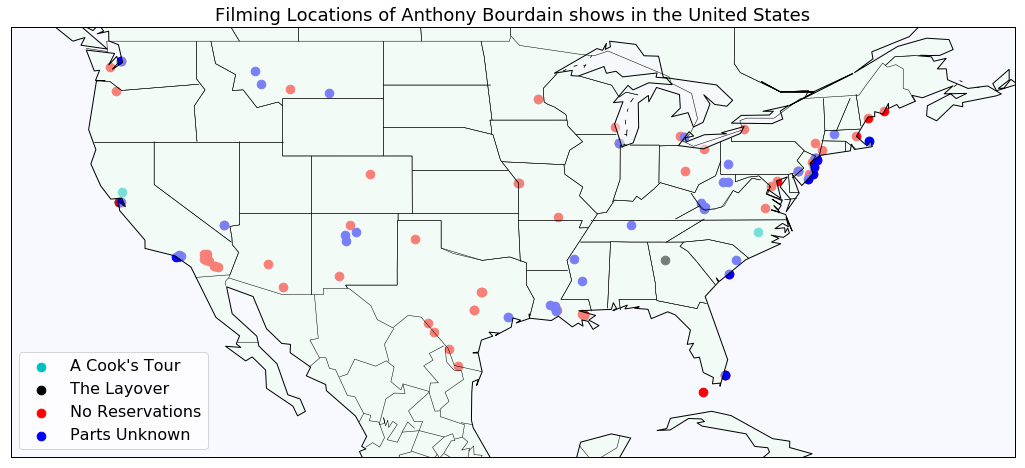

In [22]:
plt.figure(figsize=(18,15))
plt.title('Filming Locations of Anthony Bourdain shows in the United States',fontsize=18)


m = Basemap(llcrnrlat=20,urcrnrlat=50,\
                llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='ghostwhite')
m.fillcontinents(color='honeydew',alpha=.5)
m.drawcoastlines()

lons = df_bourdain_usa[df_bourdain_usa['Show']=="A Cook's Tour"]['Longitude']
lats = df_bourdain_usa[df_bourdain_usa['Show']=="A Cook's Tour"]['Latitude']

x, y = m(lons, lats)

m.scatter(x, y, marker='o',color='c',alpha=1., s=75, label="A Cook's Tour")

lons = df_bourdain_usa[df_bourdain_usa['Show']=="The Layover"]['Longitude']
lats = df_bourdain_usa[df_bourdain_usa['Show']=="The Layover"]['Latitude']

x, y = m(lons, lats)

m.scatter(x, y, marker='o',color='k',alpha=1., s=75, label="The Layover")


lons = df_bourdain_usa[df_bourdain_usa['Show']=="No Reservations"]['Longitude']
lats = df_bourdain_usa[df_bourdain_usa['Show']=="No Reservations"]['Latitude']

x, y = m(lons, lats)

m.scatter(x, y, marker='o',color='r',alpha=1., s=75, label="No Reservations")

lons = df_bourdain_usa[df_bourdain_usa['Show']=="Parts Unknown"]['Longitude']
lats = df_bourdain_usa[df_bourdain_usa['Show']=="Parts Unknown"]['Latitude']

x, y = m(lons, lats)

m.scatter(x, y, marker='o',color='b',alpha=1., s=75, label="Parts Unknown")


plt.legend(loc='lower left',fontsize=16)

plt.savefig('/Users/panchamb/Documents/Data_Analysis/Datasets/bourdain_usamap.png');